In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
from sklearn.preprocessing import StandardScaler

%matplotlib inline

C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Always reset the pseudo random number generator to the same number.
np.random.seed(1012019)

# Definition of functions

In [3]:
def batchGradientDescent(X, y, alpha=0.4, n_iterations=1000, a_init=np.array([-10.0, -10.0]).reshape(2, 1)):
    """Batch gradient descent solution."""
    
    N = len(y)
    
    # Random initialization of parameters.
    a = a_init
    
    # Create vector for parameter history.
    a_hist = np.zeros((2, n_iterations+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)

    # Create array for storing error values.
    Jgd = np.zeros(n_iterations+1)

    Jgd[0] = (1.0/N)*sum(np.power(y - X.dot(a), 2))

    # Batch gradient-descent loop.
    iteration = 0
    error = 1
    grad_hist = np.zeros((2, n_iterations))
    while iteration < n_iterations and error > 0.0001:
        gradients = -(2.0/N)*X.T.dot(y - X.dot(a))
        grad_hist[:, iteration] = gradients.reshape(2,)
        a = a - alpha*gradients
        a_hist[:, iteration+1] = a.reshape(2,)
        Jgd[iteration+1] = (1.0/N)*sum(np.power((y - X.dot(a)), 2))
        error = np.abs(Jgd[iteration+1] - Jgd[iteration])
        iteration = iteration + 1
    return a, Jgd, a_hist, grad_hist, iteration

# No feature-scaling

In [4]:
# Always reset the pseudo random number generator to the same number.
np.random.seed(1012019)

# Define the number of examples.
N = 1000

# Generate target function.
x1 = 20.0*np.random.randn(N, 1)
x2 = np.random.randn(N, 1)
y = x1 + x2

# Observable model.
y_noisy = y + np.random.randn(N, 1)

# Concatenate both column vectors, x1 and x2.
X = np.c_[x1, x2]

In [5]:
# Generate values for parameters.
M = 200
a1 = np.linspace(-12.0, 14.0, M)
a2 = np.linspace(-12.0, 14.0, M)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface.
J = np.zeros((M,M))
for iter1 in range(0, M):
    for iter2 in range(0, M):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1.0/N)*np.sum(np.square(y_noisy - yhat))

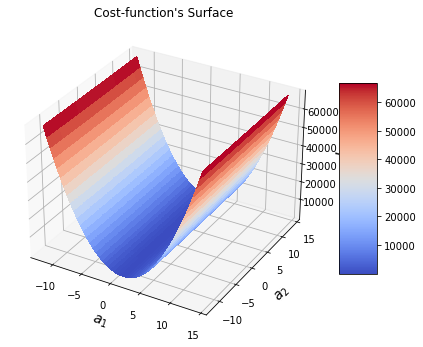

In [6]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Cost-function\'s Surface')
plt.savefig("error_surface_fs_gradient_variation.png", dpi=600)
#Show the plot.
plt.show()

In [7]:
# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

In [8]:
# Number of epochs.
n_iterations = 2000
# Constant learning rate.
alpha = 0.001
# Random initialization of parameters.
a_init =  np.array([-10.0, -10.0]).reshape(2, 1)

a, Jgd, a_hist, grad_hist, iteration = batchGradientDescent(X, y_noisy, alpha, n_iterations, a_init)

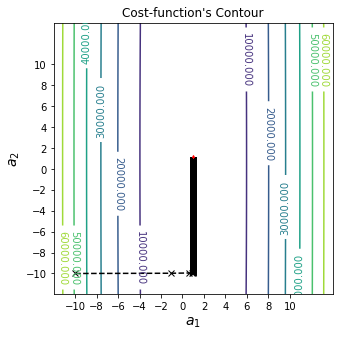

In [9]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx--')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.savefig("error_contour_no_fs_gradient_variation.png", dpi=600)
plt.show()

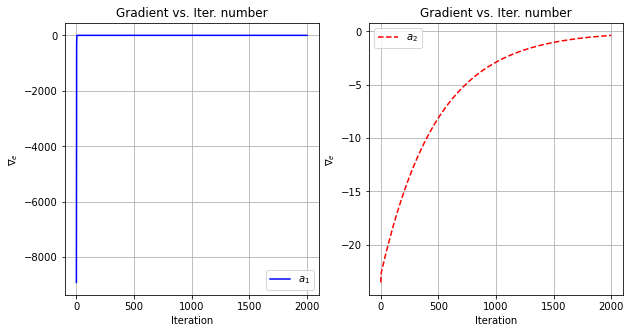

In [10]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.plot(np.arange(0, iteration), grad_hist[0,0:iteration], 'b', label='$a_1$')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('$\\nabla_e$')
ax1.set_title('Gradient vs. Iter. number')
ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(0, iteration), grad_hist[1,0:iteration], 'r--', label='$a_2$')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('$\\nabla_e$')
ax2.set_title('Gradient vs. Iter. number')
ax2.legend()
ax2.grid()

#plt.savefig("update_pure_sgd.png", dpi=600)
plt.show()

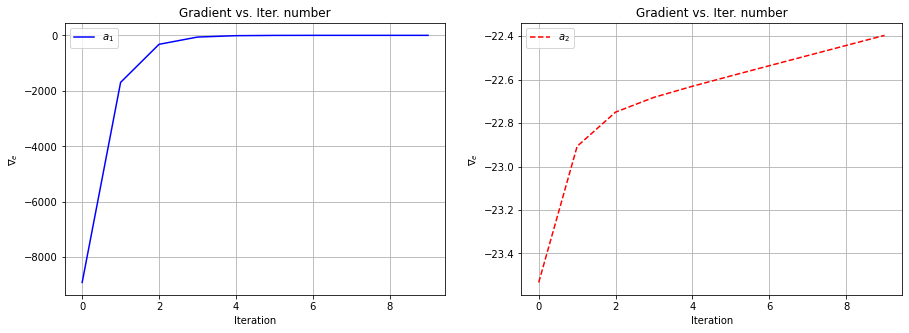

In [11]:
fig = plt.figure(figsize=(15,5))

n_iterations = 10

ax1 = fig.add_subplot(121)
ax1.plot(np.arange(0, n_iterations), grad_hist[0,0:n_iterations], 'b', label='$a_1$')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('$\\nabla_e$')
ax1.set_title('Gradient vs. Iter. number')
ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(0, n_iterations), grad_hist[1,0:n_iterations], 'r--', label='$a_2$')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('$\\nabla_e$')
ax2.set_title('Gradient vs. Iter. number')
ax2.legend()
ax2.grid()

plt.savefig("no_fs_gradient_variation.png", dpi=600)
plt.show()

# Standardization

In [12]:
# Always reset the pseudo random number generator to the same number.
np.random.seed(1012019)

# Define the number of examples.
N = 1000

# Generate target function.
x1 = 20.0*np.random.randn(N, 1)
x2 = np.random.randn(N, 1)
y = x1 + x2

# Observable model.
y_noisy = y + np.random.randn(N, 1)

In [13]:
X = np.c_[x1, x2]

# Instantiate scaler.
scaler = StandardScaler()

# Fit on training data column.
scaler.fit(X)
    
# Transform the training data.
X = scaler.transform(X)

In [14]:
# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

In [15]:
# Generate values for parameters.
M = 400
a1 = np.linspace(-2.0, 44.0, M)
a2 = np.linspace(-24.0, 26.0, M)

A1, A2 = np.meshgrid(a1, a2)

x1 = X[:,0].reshape(N,1)
x2 = X[:,1].reshape(N,1)

# Generate points for plotting the cost-function surface.
J = np.zeros((M,M))
for iter1 in range(0, M):
    for iter2 in range(0, M):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1.0/N)*np.sum(np.square(y_noisy - yhat))

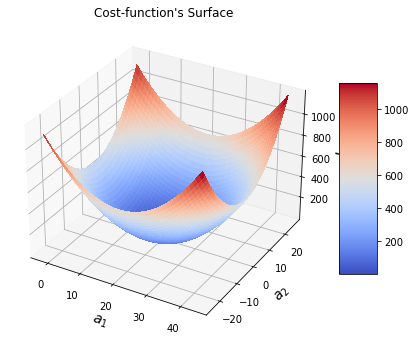

In [16]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Cost-function\'s Surface')
plt.savefig("error_surface_fs_gradient_variation.png", dpi=600)
#Show the plot.
plt.show()

In [17]:
# Number of epochs.
n_iterations = 2000
# Constant learning rate.
alpha = 0.4
# Random initialization of parameters.
a_init = np.array([-2.0, -24.0]).reshape(2, 1)

a, Jgd, a_hist, grad_hist, iteration = batchGradientDescent(X, y_noisy, alpha, n_iterations, a_init)

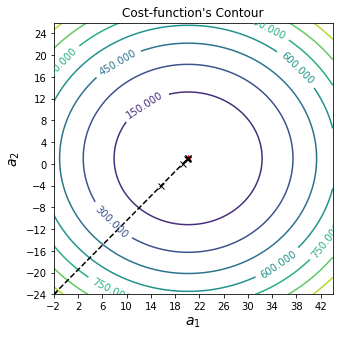

In [18]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx--')
plt.xticks(np.arange(-2, 44, step=4.0))
plt.yticks(np.arange(-24, 26, step=4.0))
plt.savefig("error_contour_fs_gradient_variation.png", dpi=600)
plt.show()

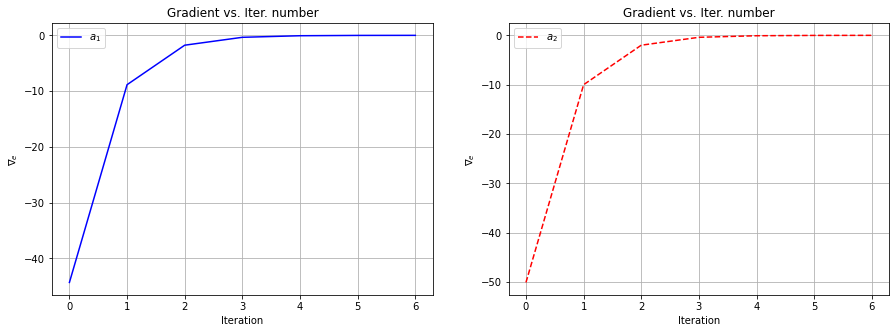

In [19]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.plot(np.arange(0, iteration), grad_hist[0,0:iteration], 'b', label='$a_1$')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('$\\nabla_e$')
ax1.set_title('Gradient vs. Iter. number')
ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(0, iteration), grad_hist[1,0:iteration], 'r--', label='$a_2$')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('$\\nabla_e$')
ax2.set_title('Gradient vs. Iter. number')
ax2.legend()
ax2.grid()

plt.savefig("gradient_standardization.png", dpi=600)
plt.show()